## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [ ]:
# посчитаем количество пропусков в данных
sum(X.isna().sum())

0

Пропущенных значений в данных нет

In [ ]:
# посмотрим типы данных в каждом из столбцов
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [ ]:
# посчитаем столбцы, где тип данных -- object
sum(X.dtypes == 'object')

0

Категориальных переменных тоже нет

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
# подгружаем необходимую функцию
from sklearn.model_selection import train_test_split

# разделяем выборку на тренировочную и тестовой, задаем долю тестовой выборки,
# фиксируем np.random.seed() и указываем stratify=y
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.3,
                                                    random_state=np.random.seed(42),
                                                    stratify=y)

Stratify используется, чтобы сохранить в тестовой и тренировочной выборке баланс классов. Это важно, потому что без такого баланса модель может "подстраиваться" под данные наибольшего класса, почти не принимая в расчет данные более маленьких классов. Например, если в тренировочной выборке 99 объектов одного класса и 1 объект другого, она с большей вероятностью найдет закономерности для первого класса, а на новых (тестовых) данных, где баланс будет другой, ее качество работы будет сильно хуже: она ничего не знает про второй класс.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
# импортируем нуобходимые классы
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# создаем объект класса StandardScaler
scaler = StandardScaler()
# масштабируем признаки в тренировочной и тестовой выборке
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# создаем список названий столбцов из исходного датафрейма
cols = list(X.columns.values)
# создаем вспомогательные датафреймы: в них теперь масштабированные признаки
# для обучающей и тестовой
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = cols)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = cols)

In [ ]:
# список признаков, по которым будем обучать
predictors = ['alcohol', 'magnesium']

# превращаем масштабированные значения в список, где только два признака
X_train_scaled = X_train_scaled_df.loc[0:, predictors]
X_train_new = np.array(X_train_scaled)

# то же самое для тестовой выборки
X_test_scaled = X_test_scaled_df.loc[0:, predictors]
X_test_new = np.array(X_test_scaled)

In [ ]:
# определяем функцию, которая будет принимать число соседей, а также
# трейновые и тестовые данные
def classify(n, X_train, y_train, X_test, y_test):
    # определяем классификатор knn, указываем число соседей и евклидову метрику
    clf = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    # делаем fit
    f = clf.fit(X_train, y_train)
    # предсказываем значения для тестовой и тренировочной выборки
    y_predicted_test = f.predict(X_test)
    y_predicted_train = f.predict(X_train)
    # смотрим на метрику accuracy для train и test (доля правильных ответов)
    acc_test = np.mean(y_test == y_predicted_test)
    acc_train = np.mean(y_train == y_predicted_train)
    # функция возвращает количество соседей, а также два значения accuracy
    # и fit (для следующего задания)
    return [n, round(acc_train, 2), round(acc_test, 2), f]

In [ ]:
# создаем список, где буду все классификаторы (fit)
clfs = []

# для каждого количества соседей запускаем функцию для данных, берем первые три значения (последнее -- фит)
cls1 = classify(1, X_train_new, y_train, X_test_new, y_test)[:3]
cls3 = classify(3, X_train_new, y_train, X_test_new, y_test)[:3]
cls5 = classify(5, X_train_new, y_train, X_test_new, y_test)[:3]
cls10 = classify(10, X_train_new, y_train, X_test_new, y_test)[:3]
cls15 = classify(15, X_train_new, y_train, X_test_new, y_test)[:3]
cls25 = classify(25, X_train_new, y_train, X_test_new, y_test)[:3]

# добавляем все fit'ы в созданные ранее список
clfs.append(classify(1, X_train_new, y_train, X_test_new, y_test)[3])
clfs.append(classify(3, X_train_new, y_train, X_test_new, y_test)[3])
clfs.append(classify(5, X_train_new, y_train, X_test_new, y_test)[3])
clfs.append(classify(10, X_train_new, y_train, X_test_new, y_test)[3])
clfs.append(classify(15, X_train_new, y_train, X_test_new, y_test)[3])
clfs.append(classify(25, X_train_new, y_train, X_test_new, y_test)[3])

# создадим вспомогательный датафрем, чтобы вывести результат
# названия столбцов
headers = ['NN', 'Train', 'Test']
# в значениях -- количество соседей, accuracy на трейне и тесте (что находили с помощью функции выше)
data = [cls1, cls3, cls5, cls10, cls15, cls25]
# создаем датафрейм и устанваливаем индексом число соседей
df = pd.DataFrame(data, columns = headers)
df = df.set_index('NN')
# выводим датафрейм
print(df)

    Train  Test
NN             
1    1.00  0.54
3    0.80  0.63
5    0.78  0.70
10   0.75  0.69
15   0.72  0.65
25   0.69  0.67


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
# устанавливаем mlxtend
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
# ...и импотируем
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

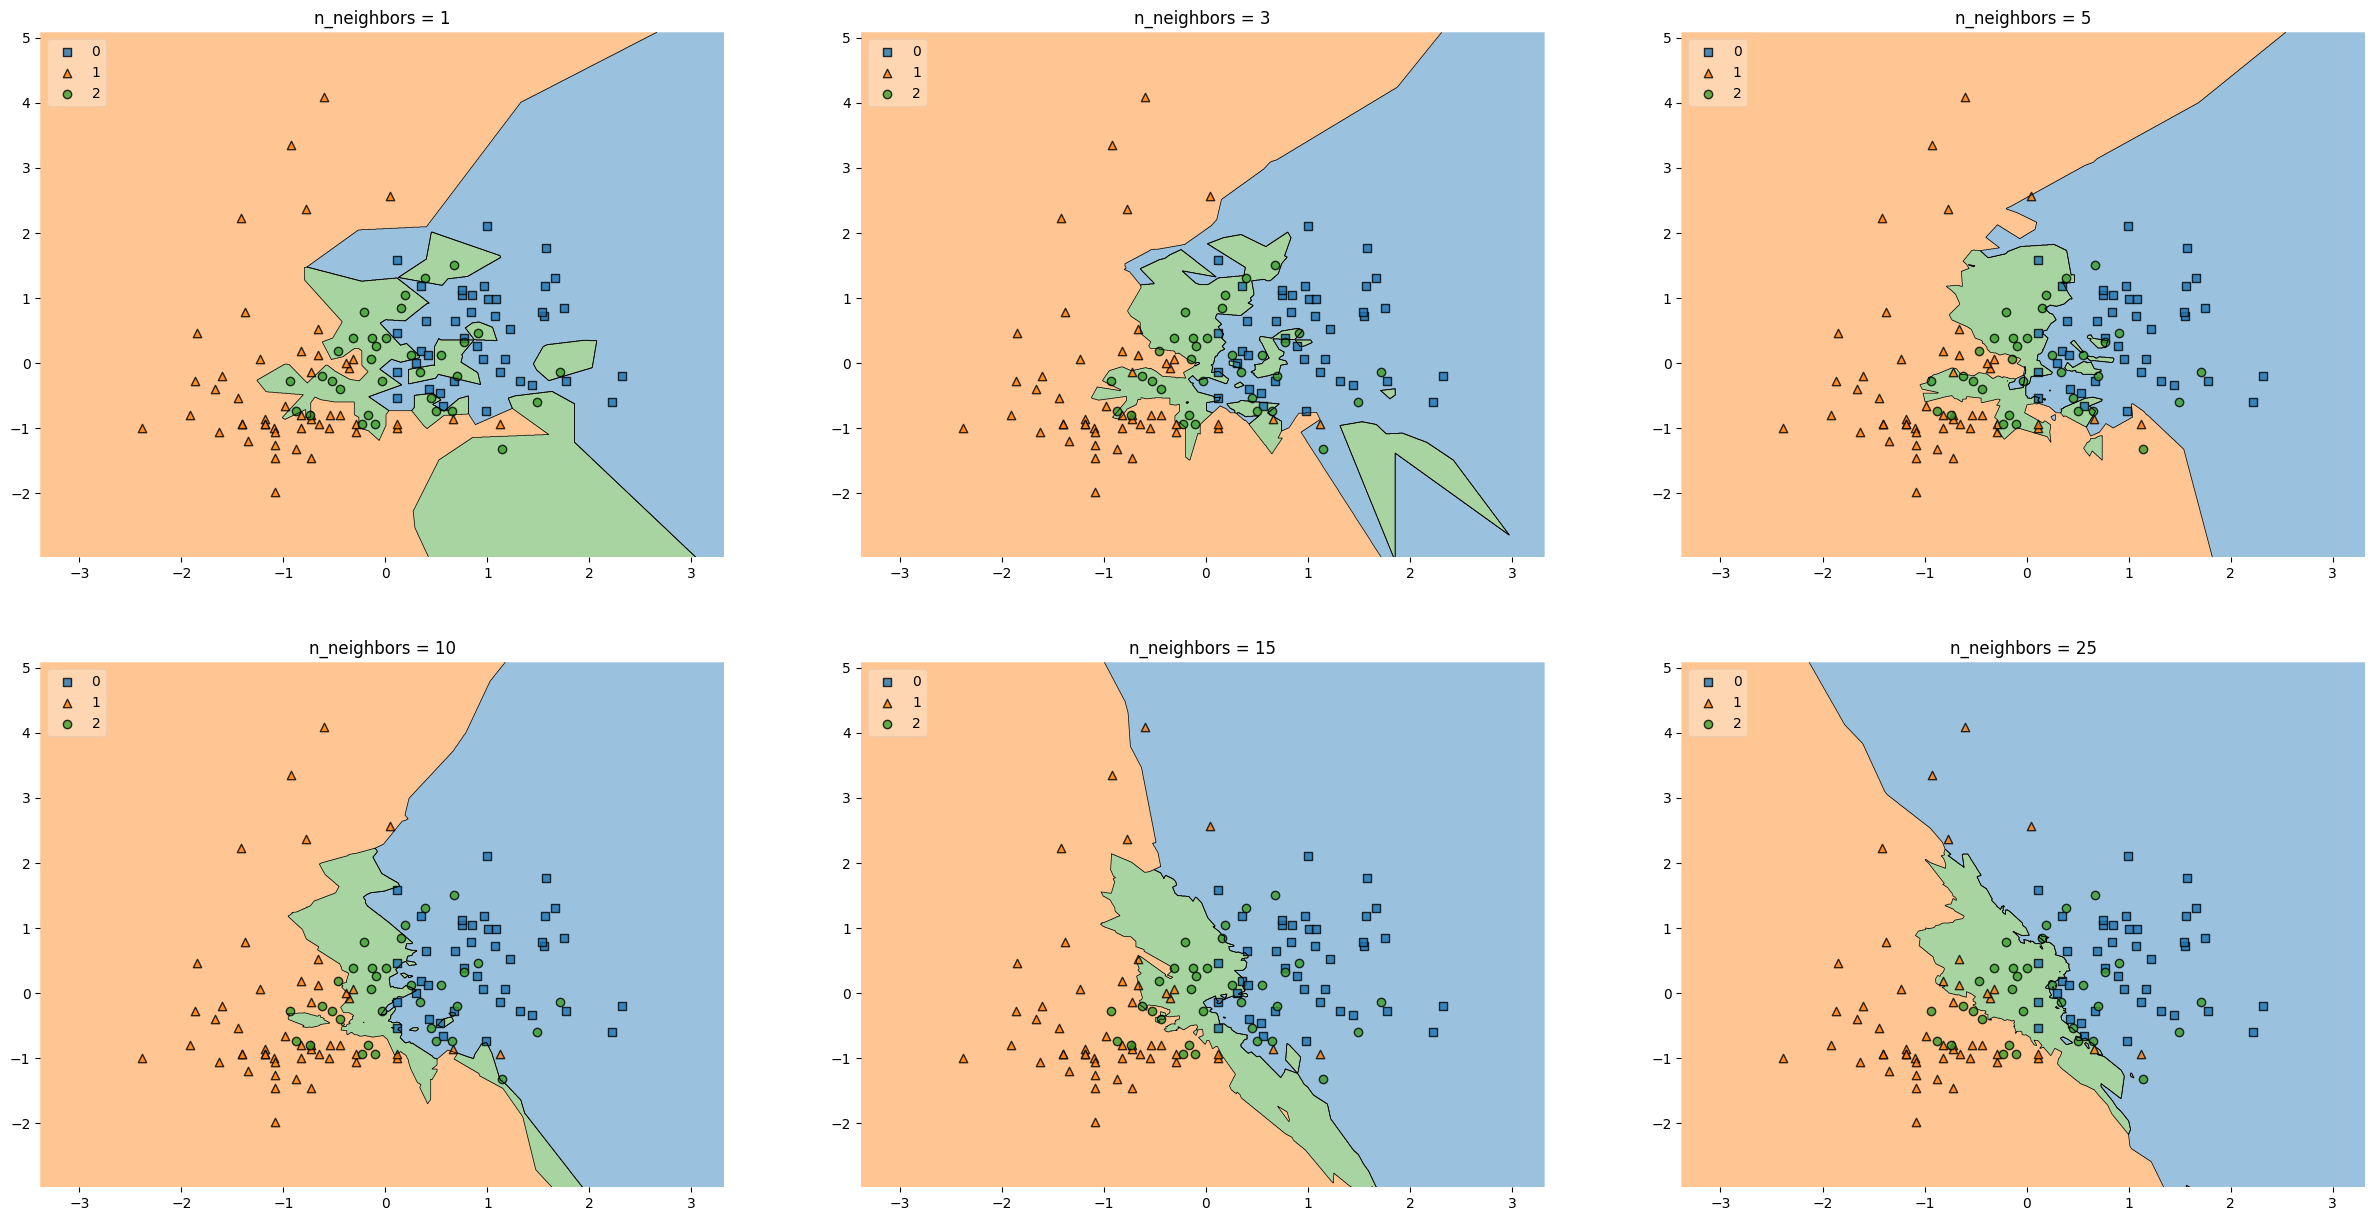

In [ ]:
# импортируем необходимые штуки
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
# делаем сетку для отображения графиков: 2 на 3
gs = gridspec.GridSpec(2, 3)

# задаем размер общего графика
fig = plt.figure(figsize=(30,15))

# здесь список из названий для каждого графика
labels = ['n_neighbors = 1', 'n_neighbors = 3', 'n_neighbors = 5',
          'n_neighbors = 10', 'n_neighbors = 15', 'n_neighbors = 25']
# строим все графики, идем по всем классификаторам и итерируемся от 0 (самый левый) до 2 (самый правый)
# повторяем эту итерацию два раза (всего 6 графиков)
for clf, lab, grd in zip(clfs,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    # задаем subplot
    ax = plt.subplot(gs[grd[0], grd[1]])
    # строим картинку
    fig = plot_decision_regions(X=X_train_new, y=y_train, clf=clf, legend=2)
    # добавляем название
    plt.title(lab)
# выводим график
plt.show()

# работает достаточно долго -- минут 25

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Исходя из таблички в задаче 1.3, лучше всего было бы использовать 25 ближаших соседей.
  
| NN |  Train | Test  |  
|----|--------|-------|  
|1   |  1.00  | 0.54  |
|3   | 0.80   |0.63   |
|5   | 0.78   |0.70   |
|10  | 0.75   |0.69   |
|15  | 0.72   |0.65   |
|25  | 0.69   |0.67   |

В этом случае значение на тестовой выборке близко к максимальному, хотя и далеко не максимальное на трейне. Зато, что очень важно, -- модель не сильно подстроилась под обучающие данные. Разница между двумя значениями при 25 соседях -- всего 0.02. В других случаях эта разница сильно выше.

Если говорить о явном переобучении, то можно отметить случай с одним соседом: качество на трейне -- 1 (что логично: выбираешь ближайшего соседа -- себя), а на тестовой -- близко к 0.54. Эта разница слишком большая.

Если же рассматривать графики, которые мы получили в задании 1.5, то при 1 соседе также видно сильное подстраивание под данные. Выделяется очень много зеленых областей, которые геометрически никак не объединяются во что-то одно красивое. Остальные графики (кроме последнего ну и, может, предпоследнего) тоже характеризуются странными формами зеленых областей. Видно, как во всех этих случаях область пытается "захватить" как можно больше точек одного цвета, что говорит о переобучении. В последнем же случае, при 25 соседях, форма зеленой фигуры наиболее геометрически естественная: хотя она не определяет все точно (много зеленых оказывается на оранжевом, например), она не подстраивается под странные выбросы, а выделяет настоящие тенденции. Аналогично можно сказать про линию раздела между синий и оранжевой областью

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

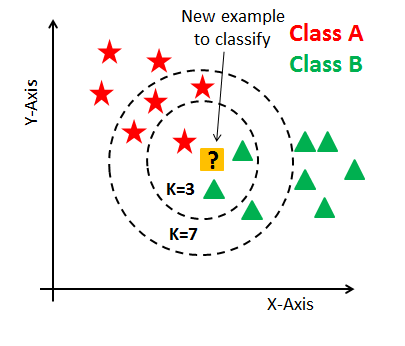

In [ ]:
# импортируем нужные штуки
import numpy as np
from collections import Counter

# создаем класс
class KNN:
    # инициализируем класс
    # аттрибут k -- количество соседей
    def __init__(self, k:int):
        self.k = k

    # определяем fit: запоминаем обучающую выборку
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    # определяем функцию для подсчета евклидова расстояния между точками
    def count_distance(self, x, y):
        # в этом массиве хранятся квадраты разницы координат точек
        square = np.square(x - y)
        # суммируем все квадраты
        sum_square = np.sum(square)
        # вычисляем корень -- это и есть расстояние
        distance = np.sqrt(sum_square)
        return distance

    # делаем predict
    def predict(self, X):
        # добавляем тестовую выборку
        self.X_test = X
        # здесь будут храниться предсказания
        y_pred = []
        # для каждого объекта в тестовой выборке
        for i in range(len(self.X_test)):
            # создаем массив с расстояниями до объектов трейновой выборки
            dis = []
            # считаем расстояние от объекта в тестовой выборке до каждого объекта трейновой выборки
            # и добавляем в массив расстоение и ответ для каждого объекта из трейновой выборки
            for j in range(len(self.X_train)):
                distance = self.count_distance(np.array(self.X_test[i]), np.array(self.X_train[j]))
                dis.append((distance, self.y_train[j]))
            # сортируем словарь и выбираем k ближайших соседей
            dis = sorted(dis)[:self.k]
            # оставляем только ответы для k ближайших соседей
            dis = [d[1] for d in dis]
            # считаем наиболее частое значение из соседей
            y_pred.append(Counter(dis).most_common(1)[0][0])
        # если нам нужно предсказать ответ только для одного объекта, возвращаем обычный список
        if len(y_pred) == 1:
            return y_pred
        # если для нескольких -- делаем np.array (почему-то по-другому не работает в функции ниже)
        else:
            return np.array(y_pred)

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
    knn = KNN(k=1)
    X_train =  np.array([[1, 1], [2, 2]])
    y_train =  np.array([0, 1])
    X_test =  np.array([[1.5, 1.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [0]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[9.5, 9.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[5.5, 5.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[15, 15]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[5, 5], [2, 2]])
    knn.fit(X_train, y_train)
    assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
# устанавливаем библиотеку для скачивания файла
!pip install wget

In [ ]:
# импортируем эту библиотеку
import wget

# и скачиваем файл по ссылке
url = 'https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2024/homeworks/hw04_knn_linreg/diamonds.csv'
filename = wget.download(url)

In [ ]:
# смотрим на данные
data = pd.read_csv('diamonds.csv', sep=',')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
# проверим пропущенные значения
sum(data.isna().sum())

0

Пропущенных значений нет

In [ ]:
# выведем характеристики числовых данных
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


По этой таблице можно явно понять, что признак Unnamed: 0 не несет существенной информации: это просто столбец индексов: от 1 до 53940. Остальные признаки скорее разные (хотя х и у очень схожи между собой: стандартное отклонение, медиана, квартили, среднее -- все очень близко, но все-таки они не совсем повторяют друг друга -- по выводу первых пяти строк выше тоже видно, что они все-таки немного различаются по значениям)

In [ ]:
# тогда удаляем столбец Unnamed: 0
data = data.drop('Unnamed: 0', axis=1)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
# выведем типы переменных для каждого столбца
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [ ]:
# посчитаем количество вещественных признаков
sum(data.dtypes == 'float')

6

Всего вещественных признаков -- 6

In [ ]:
# выведем таблицу корреляций
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


С целевой переменной очень коррелируют признаки carat (0.92), x (0.88), y (0.87) и z (0.86). Признаки depth и table показывают сильно меньшие значения по модулю, следовательно, скорее не коррелируют с price

Интересны внутренние корреляции между самими признаками: x, y, z очень коррелируют между собой (значения выше 0.95!) -- возможно, эти признаки в какой-то степени повторяют друга? а еще признак c carat тоже близок к ним

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
# с помощью get_dummies закодируем категориальные переменные
data_dum = pd.get_dummies(data)
data_dum

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [ ]:
# отделяем признаки от значения целевой переменной
X = pd.DataFrame(data_dum.drop(['price'], axis=1))
y = data_dum['price']

In [ ]:
# установим специальную библиотеку, с помощью которой можно будет
# разбить целевую переменную на некоторые категории
# необходимо для параметра stratify
!pip install verstack

In [ ]:
# scsplit -- stratified continous split
# работает для регрессии
from verstack.stratified_continuous_split import scsplit

# делим выборку на трейновую и тестовую
X_train, X_test, y_train, y_test = scsplit(X, y, test_size = 0.3, stratify = y,
                                           random_state=np.random.seed(33))

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
# сохраняем только вещественные признаки в массивы для тестовой и трейновой выборки
X_tr_float = np.array(X_train.select_dtypes('float64'))
X_ts_float = np.array(X_test.select_dtypes('float64'))

In [ ]:
# масштабируем вещественные признаки в тренировочной и тестовой выборке
# при помощи standardscaler
scaler = StandardScaler()
X_train_scaled_fl = scaler.fit_transform(X_tr_float)
X_test_scaled_fl = scaler.fit_transform(X_ts_float)

In [ ]:
# создадим списки названий столбцов для всех переменных и только для вещественных
cols_1 = np.array(data_dum.drop(['price'], axis=1).columns)
cols_f = np.array(data_dum.drop(['price'], axis=1).select_dtypes('float64').columns)
# в inds храним список индексов начального датфрейма
inds = np.in1d(cols_1, cols_f)
# fl -- индексы столбцов с вещественными признаками
fl = np.where(inds)[0]
# obj -- с категориальными
obj = np.where(~inds)[0]
# все значения категориальных признаков превращаем в массив для теста и трейна
obj_tr = np.array(X_train).T[obj].T
obj_ts = np.array(X_test).T[obj].T

# объединяем все в однц матрицу для тестовой и трейновой
X_train_scaled = np.hstack([X_train_scaled_fl, obj_tr])
X_test_scaled = np.hstack([X_test_scaled_fl, obj_ts])

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
# импортируем нужное
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# делаем фит для линейной регрессии
lr = LinearRegression().fit(X_train_scaled, y_train)

In [ ]:
# предсказываем значения
tr_predicted = lr.predict(X_train_scaled)
ts_predicted = lr.predict(X_test_scaled)

In [ ]:
# выводим среднеквадратичную ошибку
print(f"Train: {mean_squared_error(y_train, tr_predicted)}")
print(f"Test: {mean_squared_error(y_test, ts_predicted)}")

Train: 1275410.0438212836
Test: 1319181.8931552842


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
# выведем коэффициенты для каждого признака
print(pd.DataFrame(lr.coef_, cols_1))

                         0
carat          5249.592890
depth           -85.008582
table           -58.060417
x             -1551.393951
y               524.673024
z               -44.190482
cut_Fair       -560.717343
cut_Good         -4.630146
cut_Ideal       240.678311
cut_Premium     202.083999
cut_Very Good   122.585178
color_D         806.875792
color_E         608.697309
color_F         540.680481
color_G         339.966361
color_H        -153.951279
color_I        -630.173190
color_J       -1512.095474
clarity_I1    -3770.594727
clarity_IF     1497.396302
clarity_SI1    -145.335829
clarity_SI2   -1114.659628
clarity_VS1     746.274289
clarity_VS2     444.839893
clarity_VVS1   1199.404006
clarity_VVS2   1142.675695


Как мы видим, наибольшие по модулю коэффициенты -- у первой и четвертой вещественных переменной. Это переменные carat и x, их значения сильно отличаются от других значений (ср. 3 степень и 2 или 1)

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
# импортируем lasso и ridge
from sklearn.linear_model import Lasso, Ridge

# обучаем регрессию, гиперпараметр регуляризации -- 10
lasso = Lasso(10).fit(X_train_scaled, y_train)
ridge = Ridge(10).fit(X_train_scaled, y_train)

# выводим mse
print("Lasso")
print(f"Train: {mean_squared_error(y_train, lasso.predict(X_train_scaled))}")
print(f"Test: {mean_squared_error(y_test, lasso.predict(X_test_scaled))}")
print("\nRidge")
print(f"Train: {mean_squared_error(y_train, ridge.predict(X_train_scaled))}")
print(f"Test: {mean_squared_error(y_test, ridge.predict(X_test_scaled))}")

Lasso
Train: 1312956.4554343775
Test: 1332482.5232643285

Ridge
Train: 1275620.9865928185
Test: 1302412.4538167836


In [ ]:
lr.coef_

array([ 5.24959289e+03, -8.50085819e+01, -5.80604168e+01, -1.55139395e+03,
        5.24673024e+02, -4.41904820e+01, -5.60717343e+02, -4.63014557e+00,
        2.40678311e+02,  2.02083999e+02,  1.22585178e+02,  8.06875792e+02,
        6.08697309e+02,  5.40680481e+02,  3.39966361e+02, -1.53951279e+02,
       -6.30173190e+02, -1.51209547e+03, -3.77059473e+03,  1.49739630e+03,
       -1.45335829e+02, -1.11465963e+03,  7.46274289e+02,  4.44839893e+02,
        1.19940401e+03,  1.14267570e+03])

In [ ]:
lasso.coef_

array([ 4803.76705212,  -102.55763764,   -79.52612966,  -660.32018445,
          -0.        ,   -36.22567973,  -428.4832507 ,   -27.3265183 ,
          78.17438247,     0.        ,     0.        ,   318.48492814,
         160.51526693,   106.19510139,     0.        ,  -436.50782308,
        -847.40114071, -1618.38129242, -3541.6168375 ,   664.01987755,
        -618.51481457, -1528.30245728,   147.04521888,   -20.14272233,
         531.13406012,   521.81780561])

In [ ]:
ridge.coef_

array([ 5.21415364e+03, -8.45307580e+01, -5.89156073e+01, -1.38284492e+03,
        3.91521160e+02, -4.72990902e+01, -5.67487229e+02, -2.19055012e+00,
        2.42768186e+02,  1.98997425e+02,  1.27912167e+02,  8.02182160e+02,
        6.05071277e+02,  5.37650231e+02,  3.38443259e+02, -1.54785323e+02,
       -6.27304363e+02, -1.50125724e+03, -3.70337086e+03,  1.47951473e+03,
       -1.52873496e+02, -1.11824296e+03,  7.37147830e+02,  4.36861568e+02,
        1.18819950e+03,  1.13276369e+03])

Если сравнить все значения:

1) исходные linearregression

Train: 1275410.0438212836

Test: 1319181.8931552842

2) Lasso

Train: 1312956.4554343775

Test: 1332482.5232643285

3) Ridge

Train: 1275620.9865928185

Test: 1302412.4538167836

В целом можно заметить, что значения mse для всех регрессий (с/без регуляризаций) в целом почти одинаковы (но между трейнами лассо и без лассо разница достаточно большая: около 40000). Значит, видимо, веса достаточно большие, и признаки вряд ли зануляются, что, вероятно, говорит об отсутсвии проблемы мультиколлинеарности в данных. Если бы она была, то мы ожидали бы зануление повторяющихся признаков, а, следовательно, не такую большую разницу в значениях среднеквадратичной ошибки

Судя по коэффициентам, лассо их уменьшил по сравнению с другими моделями, а также занулил три признака. Но из-за возрастания ошибки, видимо, это только ухудшило модель

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [ ]:
# определим функции, которые для значения альфа возвращает норму весов

# для lasso
def lasso_reg(alpha, X_train, y_train):
    # делаем fit
    lasso = Lasso(alpha).fit(X_train, y_train)
    # возвращаем норму весов от вектора оценок коэффициентов
    return np.linalg.norm(lasso.coef_)


# для ridge
def ridge_reg(alpha, X_train, y_train):
    # делаем фит
    ridge = Ridge(alpha).fit(X_train, y_train)
    # возвращаем норму весов от вектора оценок коэффициентов
    return np.linalg.norm(ridge.coef_)

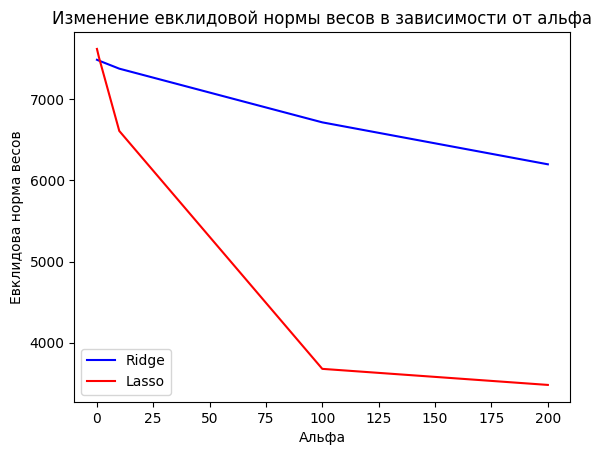

In [ ]:
# список из всех альф
alphas = [0.1, 1, 10, 100, 200]
# сюда будем добавлять нормы весов для lasso
norms_l = []
# и для ridge
norms_r = []
# для каждой альфы
for alpha in alphas:
    # добавляем норму весов в списки
    norms_l.append(lasso_reg(alpha, X_train_scaled, y_train))
    norms_r.append(ridge_reg(alpha, X_train_scaled, y_train))
# рисуем две линии:
# синяя -- для ridge
plt.plot(alphas, norms_r, color='blue', label='Ridge')
# красная -- для lasso
plt.plot(alphas, norms_l, color='red', label='Lasso')
# добавляем легенду
plt.legend(loc='lower left')
# название
plt.title('Изменение евклидовой нормы весов в зависимости от альфа')
# названия осей
plt.xlabel('Альфа')
plt.ylabel('Евклидова норма весов')
# выводим график
plt.show()

Мы видим, что Lasso гораздо активнее уменьшает веса: к значению параметра альфа в 100 разница между нормой для ridge составляет больше 3000.

Именно поэтому Lasso часто используют для отбора признаков: он быстрее приходит к нулевым значениям, а, значит, не учитывает некоторые признаки (делает их веса нулевыми).

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
# импортируем LassoCV
from sklearn.linear_model import LassoCV

# делаем фит для lasso кросс-валидации, задаем 5 участков
lasso_cv = LassoCV(cv=5).fit(X_train_scaled, y_train)

# здесь будем хранить значения средних ошибок
ers = []
# для каждой альфы в матрице ошибок
for i in range(len(lasso_cv.mse_path_)):
    # усредняем ошибку и добавляем в массив
    ers.append(sum(lasso_cv.mse_path_[i]) / len(lasso_cv.mse_path_[i]))
# находим альфу с минимальной средней ошибкой
fin_alpha = lasso_cv.alphas_[ers.index(min(ers))]
fin_alpha

3.679907662933342

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
# обучаем финальную регрессию с полученной альфой
lasso_fin = Lasso(fin_alpha).fit(X_train_scaled, y_train)

In [ ]:
# выводим призанки и коэффициенты
print(pd.DataFrame(lasso_fin.coef_, cols_1))

                         0
carat          5093.653328
depth           -94.403969
table           -66.920472
x              -904.629878
y                -0.000000
z               -35.491770
cut_Fair       -613.612983
cut_Good        -96.427422
cut_Ideal        94.578480
cut_Premium      27.974457
cut_Very Good    -0.000000
color_D         412.024260
color_E         228.632441
color_F         166.580921
color_G           0.000000
color_H        -473.998527
color_I        -925.365607
color_J       -1765.524502
clarity_I1    -4036.116472
clarity_IF      851.404683
clarity_SI1    -660.802965
clarity_SI2   -1609.227032
clarity_VS1     185.244402
clarity_VS2     -67.663288
clarity_VVS1    612.197441
clarity_VVS2    573.440452


Мы видим, что занулился 5 признак (это y) и два категориальных признака: cut_Very Good и color_G. Возможно, у зануляется из-за его очень близкой схожести с признаком х (ранее отмечала по их распределениям). А два категориальных -- потому, что, видимо, значения цвета G и значение cut'a Very good не очень влияют на итог: важны другие значения этих переменных (например, цвет H или cut Premium).

Если говорить про наибольшее значения коэффиентов по модулю, то можно выделить значение первого признака: при увеличении значения carat на совсем немного значение целевой переменной увеличивается очень сильно. С x наоборот: при увеличении х сильно уменьшается значение цены. Возможно, из-за того, что корреляция между этими признаками большая и положительная, модель пытается компенсировать их друг между другом (но, конечно, 5000 и 1000 -- это все равно большая разница, поэтому полностью скомпенсировать не получится).

Среди категориальных признаков также можно выделить значимые: особенно выделяется clarity_I1: это, видимо, какой-то очень важный признак, который может уменьшить цену

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
# находим mse на тестовой выборке
print(f"Test: {mean_squared_error(y_test, lasso_fin.predict(X_test_scaled))}")

Test: 1290161.4369937116


Значение из задачи 3.7:

Train: 1275410.0438212836

Test: 1319181.8931552842

В целом значение ошибки на тестовой выборке уменьшилос на примерно 20000.
Можно предположить, что в случае, когда между признаками наблюдается высокая корреляция (как в этом случае -- между х, у, z и carat), что можно было увидеть на этапе построения таблицы со значениями корреляций, стоит обучать lasso-регрессию, чтобы обнулять некоторые признаки, которые в каком-то смысле дублируются. Те небольшие разницы между значениями схожих признаков усложняют модель и ведут, как мне кажется к переобучению. Модель будет учитывать почти одно и то же два раза, пытаться подобрать огромные веса, чтобы компенсировать разницу между значениями схожих перемменных.

Для сравнения вот значение ошибки на трейне в полученой в итоге модели: Train: 1281209.3317404955. Разница между этим значением и значением выше (обычной регрессии) -- меньше 10000. Получается, что хотя на обучающей выборки финальной модели ошибка немного выше, ее результат на тестовой выборке все-таки немного лучше. Значит, действительно, при повторяющихся, почти дублирующих друг друга признаках некоторые признаки стоит занулять -- иначе есть риск переобучиться

In [ ]:
print(f"Train: {mean_squared_error(y_train, lasso_fin.predict(X_train_scaled))}")

Train: 1281209.3317404955
